In [1]:
import numpy as np
from random import choices, randrange
import random
import matplotlib.pyplot as plt
from numba import jit
from sklearn.datasets import make_blobs
from utility import *
from tqdm import tqdm
from sklearn.cluster import k_means

In [2]:
@jit(nopython=True)
def change_sol(sol, k):
    new_sol = sol.copy()
    n = randrange(len(new_sol))
    old_value = new_sol[n]

    while old_value == new_sol[n]:
        new_sol[n] = randrange(K)

    return new_sol

@jit(nopython=True)
def simulated_annealing(iters, alpha, base_sol, points, K, verbose = True):
    best_sol = base_sol
    base_val = squared_inner_distance(best_sol, points, K)
    best_value = base_val
    T = base_val*1/100
    Tf = 10**-5
    curr_sol = base_sol
    curr_val = best_value
    iter = 1

    old_sol = base_sol
    finito = False
    no_update = 0
    while(finito == False):
        if(verbose):
            print("Iteration number:", iter, "Best value percentuale: ", curr_val/base_val*100, "% T:", T)
        iter = 1 + iter
        old_sol = curr_sol
        
        for i in range(iters):
            candidate = change_sol(curr_sol, K)
            val_candidate = squared_inner_distance(candidate, points, K)

            if(val_candidate < best_value):
                best_value = val_candidate
                best_sol = candidate
            
            if(val_candidate < curr_val):
                curr_val = val_candidate
                curr_sol = candidate
                no_update = 0
            else:
                r = random.uniform(0, 1)
                delta = abs(curr_val - val_candidate)
                tresh = np.exp(-delta/T)
                no_update = 0
                if(r < tresh):
                    curr_val = val_candidate
                    curr_sol = candidate
                else:
                    no_update = no_update + 1

        T = alpha*T
    
        if(no_update == 500 or T <= Tf):
            finito = True
    return best_sol

In [3]:
points, centroids = make_blobs(n_samples=500, centers=5, n_features=2, random_state=2)
N = len(points)
K = 5

sol = create_initial_sol(points, K)
sol = simulated_annealing(10, 0.99, sol, points, K)

print("{:.5E}".format(squared_inner_distance(sol, points, K)))

Iteration number: 1 Best value percentuale:  100.0 % T: 14.2087615443475
Iteration number: 2 Best value percentuale:  101.4383176296225 % T: 14.066673928904024
Iteration number: 3 Best value percentuale:  103.04750644701046 % T: 13.926007189614984
Iteration number: 4 Best value percentuale:  102.20858468652145 % T: 13.786747117718834
Iteration number: 5 Best value percentuale:  103.45367677827635 % T: 13.648879646541646
Iteration number: 6 Best value percentuale:  104.01902639522613 % T: 13.51239085007623
Iteration number: 7 Best value percentuale:  106.273559289221 % T: 13.377266941575467
Iteration number: 8 Best value percentuale:  106.273559289221 % T: 13.243494272159712
Iteration number: 9 Best value percentuale:  107.94280683722887 % T: 13.111059329438115
Iteration number: 10 Best value percentuale:  108.84191751450123 % T: 12.979948736143733
Iteration number: 11 Best value percentuale:  112.38463851156347 % T: 12.850149248782296
Iteration number: 12 Best value percentuale:  113.3

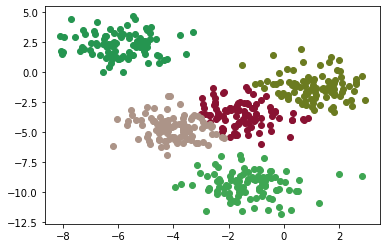

In [4]:
printR2sol(points, sol, K)

In [74]:
n_points = [500,100,200,500,1400,1000,400,700,300,800]
n_clusters = [7,4,3,2,3,2,4,5,4,6,4]
dim_points = [32,16,24,10,20,16,12,20,64,32]


vals = []

for test in tqdm(range(1,11)):
    points = load_points(f'C:/Users/franc/Documents/GitHub/Ricerca_Operativa_2022/Ricerca_Operativa_2022/benchmark/benchmark{test}.txt')
    N = len(points)
    K = n_clusters[test-1]
    sol = np.random.randint(K, size = N) #soluzione iniziale
    sol = simulated_annealing(100, 0.95, sol, points, K, squared_inner_distance, change_sol, verbose=False)
    vals.append(squared_inner_distance(sol, points, K))

print(vals)

  0%|          | 0/10 [00:00<?, ?it/s]c:\Users\franc\Documents\GitHub\Ricerca_Operativa_2022\Ricerca_Operativa_2022\utility.py:57: RuntimeWarning: invalid value encountered in true_divide
  centroids[i] = centroids[i] / num_elems[i]
  0%|          | 0/10 [00:12<?, ?it/s]


KeyboardInterrupt: 

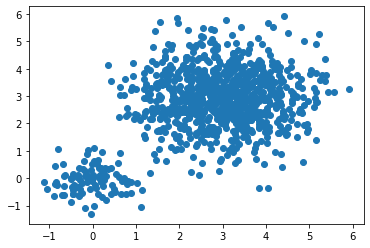

In [66]:
N = 1000
points = np.zeros((N,2))

for i in range(100):
    points[i] = np.random.randn(2)*0.5

for i in range(101,1000):
    points[i] = np.random.randn(2) + np.array([3,3])


plt.scatter(points[:,0], points[:,1])
plt.show()

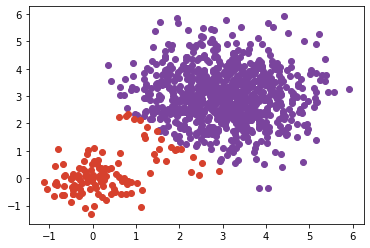

In [68]:
_, sol, _ = k_means(points, 2)
printR2sol(points, sol, 2)
